# Question 8

* Load the MNIST dataset (introduced in Chapter 3), and split it into a training set, a validation set, and a test set (e.g., use 50,000 instances for training, 10,000 for validation, and 10,000 for testing). 

* Then train various classifiers, such as a random forest classifier, an extra-trees classifier, and an SVM classifier. 

* Next, try to combine them into an ensemble that outperforms each individual classifier on the validation set, using soft or hard voting. Once you have found one, try it on the test set. How much better does it perform compared to the individual classifiers?


## Links
* https://colab.research.google.com/github/ageron/handson-ml3/blob/main/07_ensemble_learning_and_random_forests.ipynb

## Imports

In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot as plt   
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
import joblib

## Load the Dataset

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print("Shape of the training instances: ", X_train_full.shape) # 60000 images,28x28 pixel
print("Shape of the training labels: ", y_train_full.shape)
print("Shape of the test instances: ", X_test.shape) # 10000 images
print("Shape of the test labels: ", y_test.shape)

Shape of the training instances:  (60000, 28, 28)
Shape of the training labels:  (60000,)
Shape of the test instances:  (10000, 28, 28)
Shape of the test labels:  (10000,)


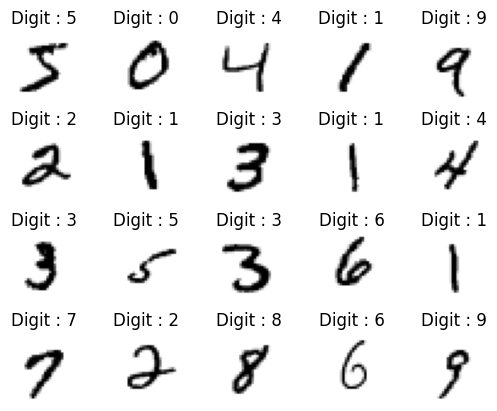

In [ ]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(X_train_full[i],cmap='gray_r')
  plt.title("Digit : {}".format(y_train_full[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

## Splitting the dataset into a training set, a validation set, and a test set

In [ ]:
# splitting the train data into a validation set and traing set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
# 5000 - validation set
# 55000 - training set

In [ ]:
print("After spliting")
print("Shape of the training instances: ", X_train.shape) # 55000 images,28x28 pixel
print("Shape of the training labels: ", y_train.shape)
print("Shape of the validation instances: ", X_valid.shape) # 5000 images,28x28 pixel
print("Shape of the validation labels: ", y_valid.shape)
print("Shape of the test instances: ", X_test.shape) # 10000 images
print("Shape of the test labels: ", y_test.shape)

After spliting
Shape of the training instances:  (55000, 28, 28)
Shape of the training labels:  (55000,)
Shape of the validation instances:  (5000, 28, 28)
Shape of the validation labels:  (5000,)
Shape of the test instances:  (10000, 28, 28)
Shape of the test labels:  (10000,)


## Preprocessing 

In [ ]:
# Flatten the training data (55000,28,28) --> (5000,784)
X_train = np.reshape(X_train, (-1, 784))
X_valid = np.reshape(X_valid, (-1, 784))
X_test = np.reshape(X_test, (-1, 784))

In [ ]:
print("After reshaping and flattening")
print("Shape of the training instances: ", X_train.shape) # 60000 images,28x28 pixel
print("Shape of the validation instances: ", X_valid.shape) # 60000 images,28x28 pixel
print("Shape of the test instances: ", X_test.shape) # 10000 images

After reshaping and flattening
Shape of the training instances:  (55000, 784)
Shape of the validation instances:  (5000, 784)
Shape of the test instances:  (10000, 784)


In [ ]:
# Feature Scaling is required
# normalize
X_train_scaled = X_train.astype('float32') / 255
X_valid_scaled = X_valid.astype('float32') / 255
X_test_scaled = X_test.astype('float32') / 255

In [ ]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
X_train_scaled[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Random Forest Classifier

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42) # 500 ağaç

In [ ]:
rnd_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [ ]:
# Make predictions for the test set
y_pred_rnd = rnd_clf.predict(X_test_scaled)

# accuracy for the test data
accuracy_score(y_test, y_pred_rnd)

0.971

In [ ]:
# accuracy on validation set
rnd_clf.score(X_valid_scaled, y_valid)

0.9752

## Extra-trees Classifier

In [ ]:
ext_clf = ExtraTreesClassifier(n_estimators=500, random_state=42)

In [ ]:
ext_clf.fit(X_train_scaled, y_train)

ExtraTreesClassifier(n_estimators=500, random_state=42)

In [ ]:
# Make predictions for the test set
y_pred_ext = ext_clf.predict(X_test_scaled)

# accuracy for the test data
accuracy_score(y_test, y_pred_ext)

0.9739

In [ ]:
# accuracy on validation set
ext_clf.score(X_valid_scaled, y_valid)

0.9766

## SVM Classifier

In [ ]:
svm_clf = LinearSVC(C=1, max_iter = 100, tol = 20, random_state=42) #  Large value of C can cause overfitting

In [ ]:
svm_clf.fit(X_train_scaled, y_train)

LinearSVC(C=1, max_iter=100, random_state=42, tol=20)

In [ ]:
# Make predictions for the test set
y_pred_svm = svm_clf.predict(X_test_scaled)

# accuracy for the test set
accuracy_score(y_test, y_pred_svm)

0.8817

In [ ]:
# accuracy on validation set
svm_clf.score(X_valid_scaled, y_valid)

0.8746

Accuracy on Validation Data
* RandomForest : 97.52
* ExtraTrees : 97.66
* LinearSVC : 87.46

## Ensemble

In [ ]:
named_estimators = [
    ("random_forest_clf", rnd_clf),
    ("extra_trees_clf", ext_clf),
    ("svm_clf", svm_clf),
]

### Hard Voting

In [ ]:
voting_clf = VotingClassifier(named_estimators)

In [ ]:
voting_clf.estimators # original estimators

[('random_forest_clf',
  RandomForestClassifier(n_estimators=500, random_state=42)),
 ('extra_trees_clf', ExtraTreesClassifier(n_estimators=500, random_state=42)),
 ('svm_clf', LinearSVC(C=1, max_iter=100, random_state=42, tol=20))]

In [ ]:
voting_clf.fit(X_train_scaled, y_train) # clones every estimator and fits the clones

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(n_estimators=500,
                                                   random_state=42)),
                             ('svm_clf',
                              LinearSVC(C=1, max_iter=100, random_state=42,
                                        tol=20))])

In [ ]:
voting_clf.estimators_ # trained estimators, fitted clones

[RandomForestClassifier(n_estimators=500, random_state=42),
 ExtraTreesClassifier(n_estimators=500, random_state=42),
 LinearSVC(C=1, max_iter=100, random_state=42, tol=20)]

In [ ]:
voting_clf.named_estimators_ # trained estimators, fitted clones

{'random_forest_clf': RandomForestClassifier(n_estimators=500, random_state=42),
 'extra_trees_clf': ExtraTreesClassifier(n_estimators=500, random_state=42),
 'svm_clf': LinearSVC(C=1, max_iter=100, random_state=42, tol=20)}

In [ ]:
voting_clf.score(X_valid_scaled, y_valid)

0.9742

In [ ]:
[estimator.score(X_valid_scaled, y_valid)
 for estimator in voting_clf.estimators_]

[0.9752, 0.9766, 0.8746]

* No better performance was seen with the Ensemble method. LinearSCV might be affecting performance badly. Now let's remove that classifier and try again.

### Without SVM

In [ ]:
voting_clf.set_params(svm_clf="drop")

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(n_estimators=500,
                                                   random_state=42)),
                             ('svm_clf', 'drop')])

In [ ]:
voting_clf.estimators # droplayınca burdan siliniyor ama trained estimator lardan silinmiyor

[('random_forest_clf',
  RandomForestClassifier(n_estimators=500, random_state=42)),
 ('extra_trees_clf', ExtraTreesClassifier(n_estimators=500, random_state=42)),
 ('svm_clf', 'drop')]

In [ ]:
voting_clf.estimators_ # trained estimators, LinearSVC hala burada

[RandomForestClassifier(n_estimators=500, random_state=42),
 ExtraTreesClassifier(n_estimators=500, random_state=42),
 LinearSVC(C=1, max_iter=100, random_state=42, tol=20)]

In [ ]:
voting_clf.named_estimators_ # trained estimators, LinearSVC hala burada

{'random_forest_clf': RandomForestClassifier(n_estimators=500, random_state=42),
 'extra_trees_clf': ExtraTreesClassifier(n_estimators=500, random_state=42),
 'svm_clf': LinearSVC(C=1, max_iter=100, random_state=42, tol=20)}

In [ ]:
# trained estimatorlardan da sil
svm_clf_trained = voting_clf.named_estimators_.pop("svm_clf")
voting_clf.estimators_.remove(svm_clf_trained)

In [ ]:
voting_clf.estimators_

[RandomForestClassifier(n_estimators=500, random_state=42),
 ExtraTreesClassifier(n_estimators=500, random_state=42)]

In [ ]:
voting_clf.named_estimators_ 

{'random_forest_clf': RandomForestClassifier(n_estimators=500, random_state=42),
 'extra_trees_clf': ExtraTreesClassifier(n_estimators=500, random_state=42)}

In [ ]:
voting_clf.score(X_valid_scaled, y_valid) # 97.42 den daha iyi

0.9756

### Soft Voting

In [ ]:
voting_clf.voting = "soft"

In [ ]:
voting_clf.score(X_valid_scaled, y_valid) # en iyi performans burda görüldü. 97.7

0.977

Accuracy on Validation Data
* RandomForest : 97.52
* ExtraTrees : 97.66
* LinearSVC : 87.46
* Ensemble : 97.7

## Evaluate on the test set

In [ ]:
voting_clf.score(X_test_scaled, y_test)

0.9728

In [ ]:
[estimator.score(X_test_scaled, y_test.astype(np.int64))
 for estimator in voting_clf.estimators_]

[0.971, 0.9739]

# Question 9

9. Run the individual classifiers from the previous exercise to make predictions on the validation set, and create a new training set with the resulting predictions: each training instance is a vector containing the set of predictions from all your classifiers for an image, and the target is the image’s class. Train a classifier on this new training set. Congratulations—you have just trained a blender, and together with the classifiers it forms a stacking ensemble! Now evaluate the ensemble on the test set. For each image in the test set, make predictions with all your classifiers, then feed the predictions to the blender to get the ensemble’s predictions. How does it compare to the voting classifier you trained earlier? Now try again using a StackingClassifier instead. Do you get better performance? If so, why?

## Imports

In [ ]:
from sklearn.ensemble import StackingClassifier

## Make predictions on the validation set and create a new trainig set with the resulting predictions

In [ ]:
estimators = [rnd_clf, ext_clf, svm_clf]

In [ ]:
X_valid_predictions = np.empty((len(X_valid), len(estimators)), dtype=object)

for index, estimator in enumerate(estimators):
    X_valid_predictions[:, index] = estimator.predict(X_valid_scaled) 
    # get out-of-sample predictions for each instance in the original training set

In [ ]:
X_valid_predictions.shape # 5000 instances, 3 classifier

(5000, 3)

In [ ]:
X_valid_predictions[:,0].shape 

(5000,)

In [ ]:
X_valid_predictions[:,0] # predictions for the random forest classifier

array([5, 0, 4, ..., 2, 1, 2], dtype=object)

## Train a classifier on this new training set

In [ ]:
rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True,
                                            random_state=42)
rnd_forest_blender.fit(X_valid_predictions, y_valid)
# one input feature per predictor, 3 for this example

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)

In [ ]:
rnd_forest_blender.oob_score_ # The OOB score is the number of correctly predicted data on OOB samples taken for validation

0.9736

## Evaluate the stacking ensemble on the test set

In [ ]:
X_test_predictions = np.empty((len(X_test), len(estimators)), dtype=object)

for index, estimator in enumerate(estimators):
    X_test_predictions[:, index] = estimator.predict(X_test_scaled)

In [ ]:
y_pred = rnd_forest_blender.predict(X_test_predictions)

In [ ]:
accuracy_score(y_test, y_pred) # before 97.28

0.9715

* This stacking ensemble does not perform as well as the voting classifier we trained earlier.

## StackingClassifier

* Since `StackingClassifier` uses K-Fold cross-validation, we don't need a separate validation set, so let's join the training set and the validation set into a bigger training set:

In [ ]:
print("Shape of the training instances: ", X_train_full.shape) # 60000 images,28x28 pixel
print("Shape of the training labels: ", y_train_full.shape)
print("Shape of the test instances: ", X_test.shape) # 10000 images
print("Shape of the test labels: ", y_test.shape)

Shape of the training instances:  (60000, 28, 28)
Shape of the training labels:  (60000,)
Shape of the test instances:  (10000, 784)
Shape of the test labels:  (10000,)


In [ ]:
# Flatten the training data (60000,28,28) --> (60000,784)
X_train_full = np.reshape(X_train_full, (-1, 784))
print("Shape of the training instances: ", X_train_full.shape) # 60000 images,28x28 pixel
print("Shape of the training labels: ", y_train_full.shape)

Shape of the training instances:  (60000, 784)
Shape of the training labels:  (60000,)


In [ ]:
# Feature Scaling is required
# normalize
X_train_full_scaled = X_train_full.astype('float32') / 255

* **Warning**: the following cell will take quite a while to run (15-30 minutes depending on your hardware), as it uses K-Fold validation with 5 folds by default. It will train the 3 classifiers 5 times each on 80% of the full training set to make the predictions, plus one last time each on the full training set, and lastly it will train the final model on the predictions. That's a total of 19 models to train!

* Once the blender is trained, the base predictors are retrained one last time on the full original training set.

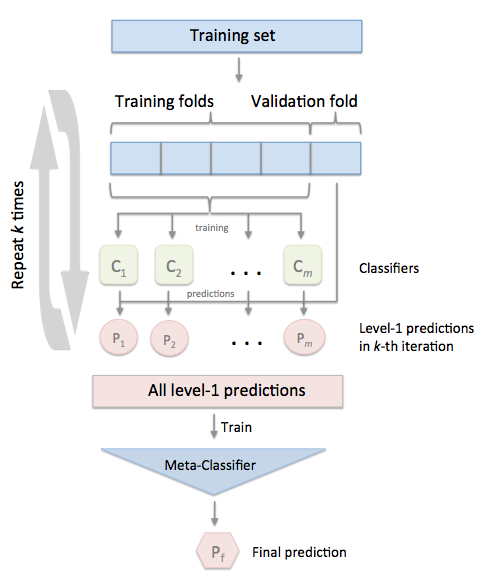

In [ ]:
stack_clf = StackingClassifier(named_estimators, # 40 dk sürdü
                               final_estimator=rnd_forest_blender)
stack_clf.fit(X_train_full_scaled, y_train_full)

StackingClassifier(estimators=[('random_forest_clf',
                                RandomForestClassifier(n_estimators=500,
                                                       random_state=42)),
                               ('extra_trees_clf',
                                ExtraTreesClassifier(n_estimators=500,
                                                     random_state=42)),
                               ('svm_clf',
                                LinearSVC(C=1, max_iter=100, random_state=42,
                                          tol=20))],
                   final_estimator=RandomForestClassifier(n_estimators=200,
                                                          oob_score=True,
                                                          random_state=42))

In [ ]:
stack_clf.score(X_test_scaled, y_test) # validationa data ayırmadık ayrıca, daha fazla data üzerinde train ettik
# predict_proba kullandı ve class porbability ile çalıştı

0.9786

* The `StackingClassifier` significantly outperforms the custom stacking implementation we tried earlier! This is for mainly two reasons:

* Since we could reclaim the validation set, the `StackingClassifier` was trained on a larger dataset.
* It used `predict_proba()` if available, or else `decision_function()` if available, or else `predict()`. This gave the blender much more nuanced inputs to work with. - class probability